In [2]:
import pandas as pd
import numpy as np
from taigapy import create_taiga_client_v3
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
tc= create_taiga_client_v3()

In [5]:
crispr_dependencies = pd.read_pickle("pydata/tfs_dependencies.pkl")

In [6]:
crispr_dependencies.fillna(0, inplace=True)

In [7]:
OmicsFusionFiltered = tc.get(name='internal-24q4-8c04', version=117, file='OmicsFusionFiltered')
Model = tc.get(name='internal-24q4-8c04', version=101, file='Model')

In [8]:
OmicsFusionFiltered.LeftGene = OmicsFusionFiltered.LeftGene.map(lambda x: x.split(' ')[0])
OmicsFusionFiltered.RightGene = OmicsFusionFiltered.RightGene.map(lambda x: x.split(' ')[0])

# Look at distribution of CRISPR dependencies among left vs. right genes in translocations

In [ ]:
left_gene_common_tfs = [tf for tf in OmicsFusionFiltered.LeftGene if tf in crispr_dependencies.columns]
right_gene_common_tfs = [tf for tf in OmicsFusionFiltered.RightGene if tf in crispr_dependencies.columns]

In [ ]:
# filter crispr_dependencies to include only TFs also found in fusions
crispr_dependencies_tfs = crispr_dependencies.loc[:, list(set(left_gene_common_tfs + right_gene_common_tfs))]

In [ ]:
crispr_dependencies_tfs

In [ ]:
# merge crispr_dependencies with cell line information based on ModelID (index in crispr_dependencies)
crispr_dependencies_tfs_merge = crispr_dependencies_tfs.merge(Model[['ModelID', 'CellLineName', "OncotreeLineage", "OncotreeSubtype", "PrimaryOrMetastasis"]], left_index = True, right_on = 'ModelID')

In [ ]:
crispr_dependencies_tfs_merge = crispr_dependencies_tfs_merge.melt(value_vars = set(left_gene_common_tfs + right_gene_common_tfs), id_vars= ['ModelID', 'CellLineName', "OncotreeLineage", "OncotreeSubtype", "PrimaryOrMetastasis"],
                                                    var_name = "TF", value_name = "Depmap_score")

In [ ]:
crispr_dependencies_tfs_merge

In [ ]:
leftgene_fusion_dependencies_df = OmicsFusionFiltered.merge(crispr_dependencies_tfs_merge, left_on= ['ModelID', 'LeftGene'], right_on= ['ModelID', 'TF'])
rightgene_fusion_dependencies_df = OmicsFusionFiltered.merge(crispr_dependencies_tfs_merge, left_on= ['ModelID', 'RightGene'], right_on= ['ModelID', 'TF'])

In [ ]:
rightgene_fusion_dependencies_df['gene_side'] = "right"
leftgene_fusion_dependencies_df['gene_side']= "left"

In [ ]:
concatenated_fusion_dependencies = pd.concat([leftgene_fusion_dependencies_df, rightgene_fusion_dependencies_df])

In [ ]:
concatenated_fusion_dependencies

In [ ]:
concatenated_fusion_dependencies.isnull().sum()

In [ ]:
sns.boxplot(concatenated_fusion_dependencies, x = "gene_side" , y = "Depmap_score", fliersize= 1)

# How often are TFs that participate in translocations also a dependency?

In [9]:
# merge crispr_dependencies with cell line information based on ModelID (index in crispr_dependencies)
crispr_dependencies_merge = crispr_dependencies.merge(Model[['ModelID', 'CellLineName', "OncotreeLineage", "OncotreeSubtype", "PrimaryOrMetastasis"]], left_index = True, right_on = 'ModelID')

In [10]:
crispr_dependencies_merge

,TFAP2A,TFAP2B,TFAP2C,TFAP2D,TFAP2E,ARID3A,ARID3B,ARID3C,ARID5A,ARID5B,...,BMAL2,ZNF875,CBLL2,ZUP1,TBXT,ModelID,CellLineName,OncotreeLineage,OncotreeSubtype,PrimaryOrMetastasis
0,0.032275,-0.052657,-0.099978,-0.040024,0.060890,0.102625,-0.121782,0.027268,-0.243864,-0.096952,...,0.140806,-0.892911,0.215270,-0.014496,0.169385,ACH-000001,NIH:OVCAR-3,Ovary/Fallopian Tube,High-Grade Serous Ovarian Cancer,Metastatic
3,0.145169,0.066916,-0.074218,-0.125423,0.240744,-0.105335,-0.734358,-0.027738,-0.136107,0.008301,...,-0.090015,0.168027,0.280951,-0.182743,0.082328,ACH-000004,HEL,Myeloid,Acute Myeloid Leukemia,Primary
4,0.171513,-0.361703,-0.017947,-0.103094,0.315080,0.069369,-0.026263,-0.022071,0.006219,0.200501,...,-0.134599,0.374316,-0.018200,-0.283811,0.058674,ACH-000005,HEL 92.1.7,Myeloid,Acute Myeloid Leukemia,None
6,-0.073170,0.200249,-0.292673,-0.238197,-0.059635,0.041934,-0.329979,-0.080568,-0.067746,-0.198359,...,-0.069550,0.180594,0.104287,-0.311871,-0.006005,ACH-000007,LS513,Bowel,Colon Adenocarcinoma,Primary
8,0.224490,-0.001485,-0.172446,0.018604,0.034670,-0.316335,-0.053869,0.059077,-0.058235,-0.495861,...,0.027901,0.098494,0.060150,0.014514,0.136429,ACH-000009,C2BBe1,Bowel,Colon Adenocarcinoma,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,-0.070363,-0.033106,-0.243238,-0.370448,-0.108596,0.023995,-0.181551,-0.213355,-0.284968,-0.052868,...,-0.106350,0.018423,0.079413,0.005381,0.105370,ACH-003578,ES8_SLFN11-KO,Bone,Ewing Sarcoma,Primary
2516,-0.081792,-0.181257,-0.381345,-0.202155,0.109083,-0.004828,0.018773,-0.112690,-0.071700,-0.386106,...,-0.077457,-0.205756,-0.021425,0.016575,0.077086,ACH-003580,SJ-DIPGX7,CNS/Brain,Diffuse Intrinsic Pontine Glioma,None
2518,-0.128495,-0.347200,-0.229025,-0.420290,0.106401,-0.087998,0.062317,-0.158840,0.009397,-0.086930,...,0.210714,-0.104913,-0.141233,0.058059,0.013758,ACH-003587,531MII,Bone,Osteosarcoma,Metastatic
2520,0.029615,-0.090314,-0.087541,-0.343993,0.073768,-0.087375,-0.049801,-0.047360,0.009253,-0.328680,...,-0.007903,-0.250206,-0.080775,0.102683,0.069626,ACH-003590,YCUB-2,Lymphoid,B-Lymphoblastic Leukemia/Lymphoma,Recurrent


In [ ]:
# merge crispr dependencies with model information
crispr_dependencies_merge = crispr_dependencies_merge.melt(value_vars = crispr_dependencies_merge.columns, id_vars= ['ModelID', 'CellLineName', "OncotreeLineage", "OncotreeSubtype", "PrimaryOrMetastasis"],
                                                    var_name = "TF", value_name = "Depmap_score")

In [ ]:
crispr_dependencies_merge

In [13]:
tf_list_reviewed = pd.read_csv('tf_list_reviewed.csv')

In [ ]:
# Want to identify transcription factors involved in each translocation
# If there is only one TF in a pair, add it to tf_translocation_side_a
# If there are two TFs, add the other one to tf_translocation_side_b
OmicsFusionFiltered['tf_translocation_side_a'] = None
OmicsFusionFiltered['tf_translocation_side_b'] = None

for idx, row in OmicsFusionFiltered.iterrows():

    # assign left_gene and right_gene
    left_gene = row['LeftGene']
    right_gene = row['RightGene']
    
    # Check if LeftGene and RightGene are in the tf_list_reviewed['hugo_symbol']
    left_in_tf = left_gene in tf_list_reviewed['hugo_symbol'].values
    right_in_tf = right_gene in tf_list_reviewed['hugo_symbol'].values
    
    if left_in_tf and right_in_tf:
        # If both are present, assign one to each column
        OmicsFusionFiltered.at[idx, 'tf_translocation_side_a'] = left_gene
        OmicsFusionFiltered.at[idx, 'tf_translocation_side_b'] = right_gene
    elif left_in_tf:
        # If only LeftGene is present
        OmicsFusionFiltered.at[idx, 'tf_translocation_side_a'] = left_gene
    elif right_in_tf:
        # If only RightGene is present
        OmicsFusionFiltered.at[idx, 'tf_translocation_side_a'] = right_gene


In [15]:
# Remove and translocations that do not invovle TFs
OmicsFusionFiltered_tfs = OmicsFusionFiltered[
    (OmicsFusionFiltered['tf_translocation_side_a'].notna())|
    (OmicsFusionFiltered['tf_translocation_side_b'].notna())
]

In [16]:
OmicsFusionFiltered_tfs

,ModelID,FusionName,JunctionReadCount,SpanningFragCount,SpliceType,LeftGene,LeftBreakpoint,RightGene,RightBreakpoint,LargeAnchorSupport,FFPM,LeftBreakDinuc,LeftBreakEntropy,RightBreakDinuc,RightBreakEntropy,annots,CCLE_count,tf_translocation_side_a,tf_translocation_side_b
4,ACH-001113,ADNP2--PLIN3,50,40,INCL_NON_REF_SPLICE,ADNP2,chr18:80117650:+,PLIN3,chr19:4867657:-,YES_LDAS,1.3993,GT,1.7819,AG,1.8323,"[""CCLE_StarF2019"",""INTERCHROMOSOMAL[chr18--chr...",2,ADNP2,None
5,ACH-000705,ADNP2--PLIN3,190,81,INCL_NON_REF_SPLICE,ADNP2,chr18:80117650:+,PLIN3,chr19:4867657:-,YES_LDAS,3.6475,GT,1.7819,AG,1.8323,"[""CCLE_StarF2019"",""INTERCHROMOSOMAL[chr18--chr...",2,ADNP2,None
57,ACH-001227,YWHAZ--ZNF706,2,4,ONLY_REF_SPLICE,YWHAZ,chr8:100951929:-,ZNF706,chr8:101201743:-,YES_LDAS,0.0831,GT,1.7465,AG,1.9656,"[""INTRACHROMOSOMAL[chr8:0.22Mb]""]",150,ZNF706,None
58,ACH-002979,YWHAZ--ZNF706,2,0,ONLY_REF_SPLICE,YWHAZ,chr8:100951929:-,ZNF706,chr8:101201743:-,YES_LDAS,0.0551,GT,1.7465,AG,1.9656,"[""INTRACHROMOSOMAL[chr8:0.22Mb]""]",150,ZNF706,None
59,ACH-001001,YWHAZ--ZNF706,3,0,ONLY_REF_SPLICE,YWHAZ,chr8:100951929:-,ZNF706,chr8:101201743:-,YES_LDAS,0.0556,GT,1.7465,AG,1.9656,"[""INTRACHROMOSOMAL[chr8:0.22Mb]""]",150,ZNF706,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59425,ACH-003182,TP53--AC116049.2,55,1,ONLY_REF_SPLICE,TP53,chr17:7687377:-,AC116049.2,chr4:66122356:+,YES_LDAS,0.6316,GT,1.8256,AG,1.8295,"[""INTERCHROMOSOMAL[chr17--chr4]""]",1,TP53,None
59426,ACH-003182,ARNT--RPS27AP6,37,2,INCL_NON_REF_SPLICE,ARNT,chr1:150876543:-,RPS27AP6,chr1:150881705:-,YES_LDAS,0.4399,GT,1.7232,AG,1.8892,"[""INTRACHROMOSOMAL[chr1:0.00Mb]"",""LOCAL_REARRA...",1,ARNT,None
59427,ACH-003182,TP53--AC116049.2,23,1,ONLY_REF_SPLICE,TP53,chr17:7687377:-,AC116049.2,chr4:66135388:+,YES_LDAS,0.2707,GT,1.8256,AG,1.8062,"[""INTERCHROMOSOMAL[chr17--chr4]""]",1,TP53,None
59431,ACH-003182,SETD1A--FBXL19,13,1,ONLY_REF_SPLICE,SETD1A,chr16:30969462:+,FBXL19,chr16:30942116:+,YES_LDAS,0.1579,GT,1.9656,AG,1.9656,"[""INTRACHROMOSOMAL[chr16:0.01Mb]"",""LOCAL_REARR...",1,FBXL19,None


In [ ]:
# left merge of dependencies_translocations_df_side_a with fusion data - this will retain all rows of dependenies
dependencies_translocations_df_side_a = crispr_dependencies_merge.merge(OmicsFusionFiltered_tfs, left_on= ['ModelID', 'TF'], right_on= ['ModelID', 'tf_translocation_side_a'], how = "left")

In [ ]:
# translocation_tf_side_a will be NA, unless the TF is a translocation in that cell line
dependencies_translocations_df_side_a['has_translocation'] = dependencies_translocations_df_side_a.tf_translocation_side_a.notna()

In [19]:
dependencies_translocations_df_side_a.loc[dependencies_translocations_df_side_a['TF'] == "ZBTB42",:]

,ModelID,CellLineName,OncotreeLineage,OncotreeSubtype,PrimaryOrMetastasis,TF,Depmap_score,FusionName,JunctionReadCount,SpanningFragCount,...,FFPM,LeftBreakDinuc,LeftBreakEntropy,RightBreakDinuc,RightBreakEntropy,annots,CCLE_count,tf_translocation_side_a,tf_translocation_side_b,has_translocation
479512,ACH-000001,NIH:OVCAR-3,Ovary/Fallopian Tube,High-Grade Serous Ovarian Cancer,Metastatic,ZBTB42,-0.059471,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
479513,ACH-000004,HEL,Myeloid,Acute Myeloid Leukemia,Primary,ZBTB42,-0.025549,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
479514,ACH-000005,HEL 92.1.7,Myeloid,Acute Myeloid Leukemia,None,ZBTB42,-0.055550,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
479515,ACH-000007,LS513,Bowel,Colon Adenocarcinoma,Primary,ZBTB42,0.001765,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
479516,ACH-000009,C2BBe1,Bowel,Colon Adenocarcinoma,Primary,ZBTB42,-0.076848,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480880,ACH-003578,ES8_SLFN11-KO,Bone,Ewing Sarcoma,Primary,ZBTB42,-0.124391,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
480881,ACH-003580,SJ-DIPGX7,CNS/Brain,Diffuse Intrinsic Pontine Glioma,None,ZBTB42,-0.102165,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
480882,ACH-003587,531MII,Bone,Osteosarcoma,Metastatic,ZBTB42,-0.173932,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
480883,ACH-003590,YCUB-2,Lymphoid,B-Lymphoblastic Leukemia/Lymphoma,Recurrent,ZBTB42,-0.131834,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [27]:
from scipy.stats import mannwhitneyu

In [ ]:
def make_boxplot(tf):
    filtered_df = dependencies_translocations_df_side_a.loc[dependencies_translocations_df_side_a['TF'] == tf,:]
    no_translocation_scores = filtered_df.loc[filtered_df.tf_translocation_side_a.isna(), 'Depmap_score']
    translocation_scores = filtered_df.loc[filtered_df.tf_translocation_side_a.notna(), 'Depmap_score']
    sns.boxplot(filtered_df, x = 'has_translocation', y = 'Depmap_score')
    # Example using t-tests for comparing two groups
    t_test_results = {}
    # Check if groups are large enough to perform a t-test
    if len(no_translocation_scores) >= 5 and len(translocation_scores) >= 5:
        statistic, p_value = mannwhitneyu(no_translocation_scores, translocation_scores, alternative='two-sided')
        
    else:
        print("Not enough data")
    print(p_value)


    

1.520051648336744e-08


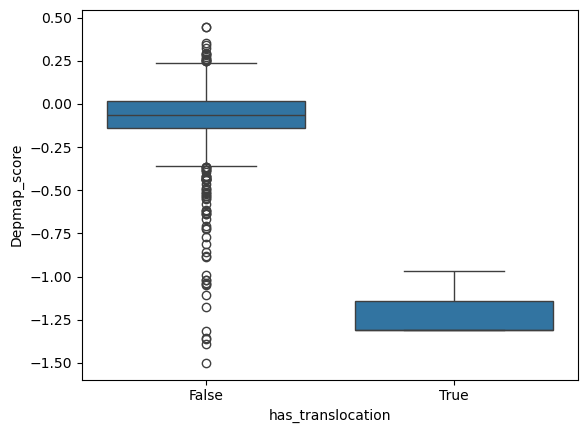

In [42]:
make_boxplot("MITF")

<Axes: xlabel='has_translocation', ylabel='Depmap_score'>

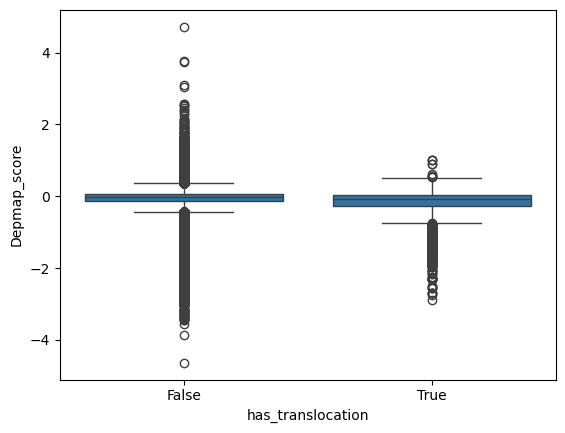

In [35]:
sns.boxplot(dependencies_translocations_df_side_a, x = 'has_translocation', y = 'Depmap_score')

0.19615977641101734


In [ ]:
dependencies_translocations_df_side_a.TF.unique()